In [1]:
import pandas as pd
import torch
import numpy as np

In [31]:
def eval_model(imputations, realpath, dfpath):
    
    imputation = pd.read_csv("./result/" + imputations)
    imputation = imputation

    df = pd.read_csv("./dataset/" + dfpath).drop(['datetime'], axis = 1)
    real = pd.read_csv("./dataset/" + realpath).drop(['datetime'], axis = 1)

    df_scaler = ((df-df.mean()) / df.std()).values

    real_scaler = (real - df.mean()) / df.std()
    masks = ~np.isnan(df_scaler)
    masks = torch.from_numpy(masks).to(torch.float32).detach().numpy()

    real_masks = ~np.isnan(real_scaler.values)
    real_masks = torch.from_numpy(real_masks).to(torch.float32).detach().numpy()
    real_scaler = np.nan_to_num(real_scaler.values)

    test_masks = real_masks - masks

    Nonscale_imputataion = pd.DataFrame(imputation.values , columns = df.columns)
    Nonscale_imputataion = (Nonscale_imputataion * df.std()) + df.mean()

    real = real.fillna(0)

    print("Scale MAE :", np.sum(np.abs(imputation.values - real_scaler) * test_masks) / np.sum(test_masks))
    print("Scale MRE :", np.sum(np.abs(imputation.values - real_scaler) * test_masks) / np.sum(np.abs(real_scaler * test_masks)))

    print("Original MAE :", np.sum(np.abs((Nonscale_imputataion - real).values * test_masks)) / np.sum(test_masks))
    print("Original MRE :", np.sum(np.abs((Nonscale_imputataion - real).values * test_masks)) / np.sum(np.abs(real.values * test_masks)))

    return Nonscale_imputataion

In [6]:
Nonscale_imputataion = eval_model("air_1000_0.042_time.csv", "pm25_ground.txt", "pm25_missing.txt")

Scale MAE : 0.31660955861088863
Scale MRE : 0.45708416976198774
Original MAE : 25.501704173153296
Original MRE : 0.35821848806310186


In [32]:
Nonscale_imputataion = eval_model("air_1000_0.05_time.csv", "pm25_ground.txt", "pm25_missing.txt")

Scale MAE : 0.32600546734531616
Scale MRE : 0.4706488933347002
Original MAE : 26.244345089085357
Original MRE : 0.36865024996703916


In [11]:
df = df[df.columns[1:]]

In [13]:
real = pd.read_csv("./dataset/pm25_ground.txt").drop(['datetime'], axis = 1)
missing = pd.read_csv("./dataset/pm25_missing.txt").drop(['datetime'], axis = 1)
Nonscale_imputataion = pd.DataFrame(df.values , columns = real.columns)
Nonscale_imputataion = (Nonscale_imputataion * missing.std()) + missing.mean()

In [21]:
inter = Nonscale_imputataion.values.T

In [22]:
real_value = real.values.T

In [20]:
import matplotlib.pyplot as plt

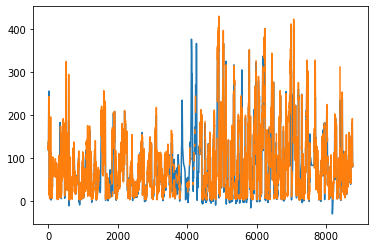

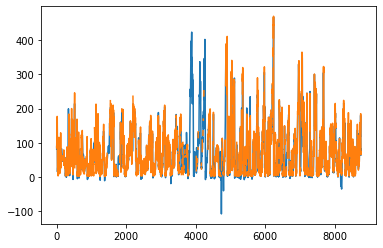

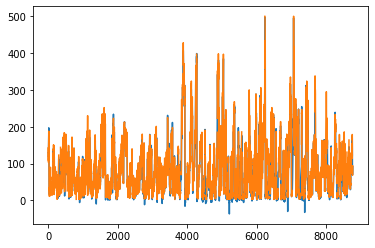

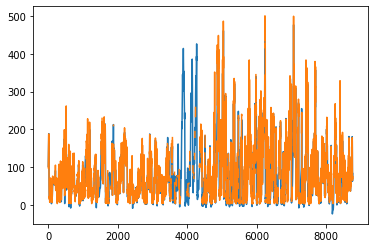

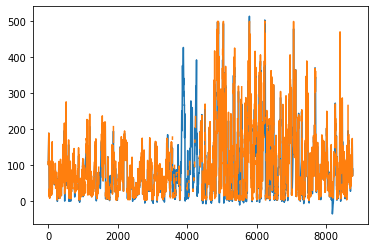

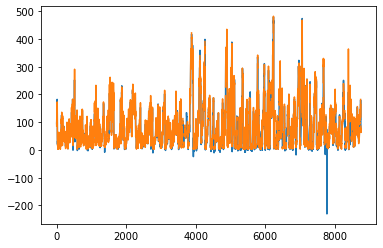

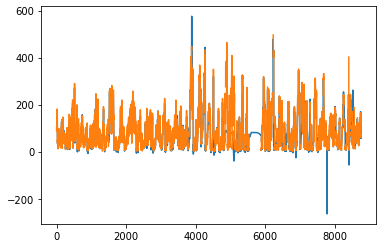

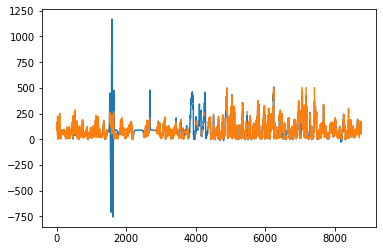

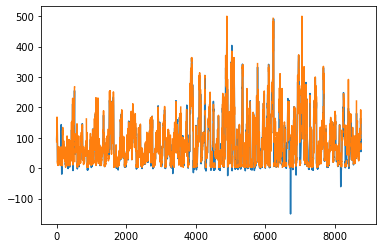

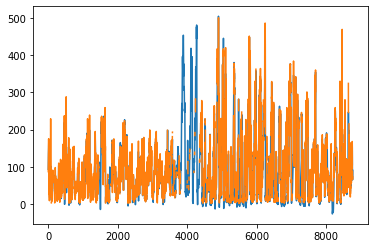

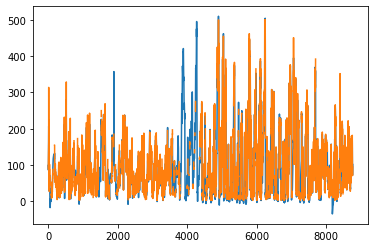

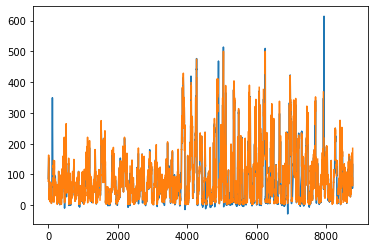

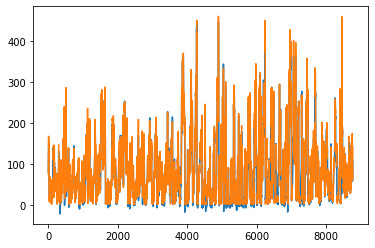

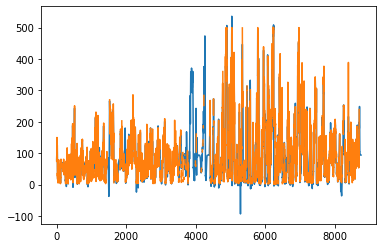

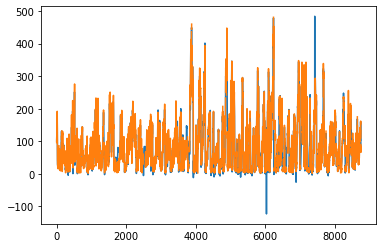

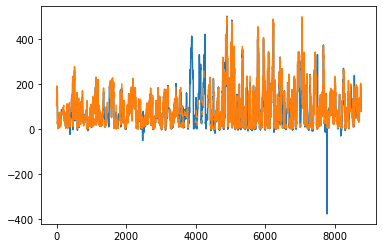

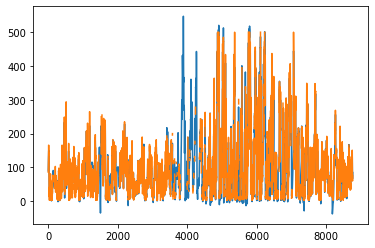

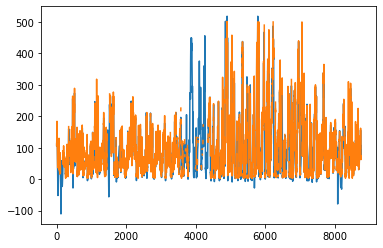

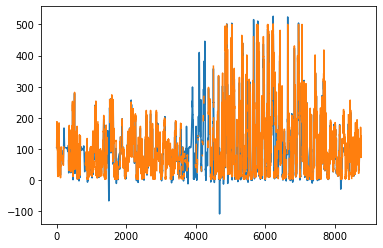

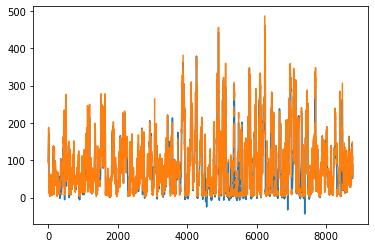

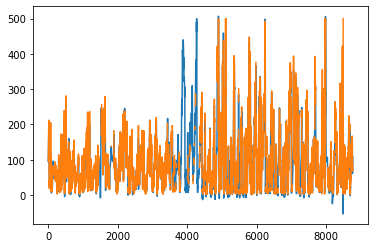

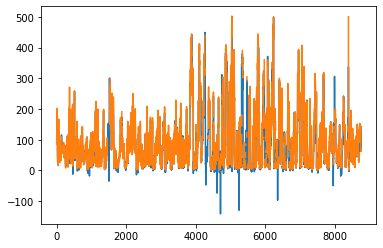

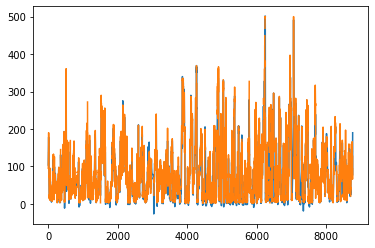

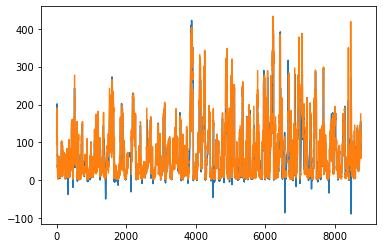

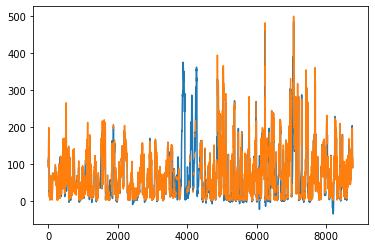

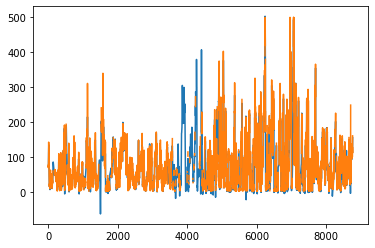

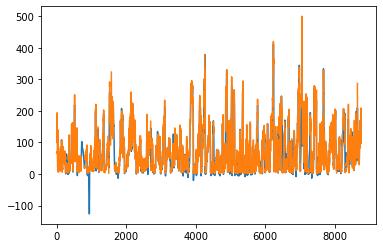

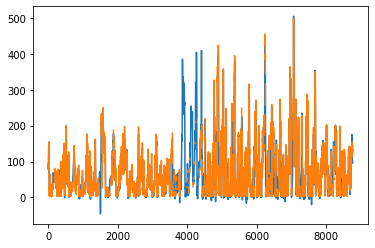

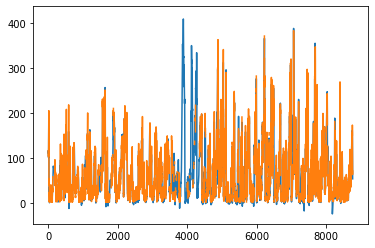

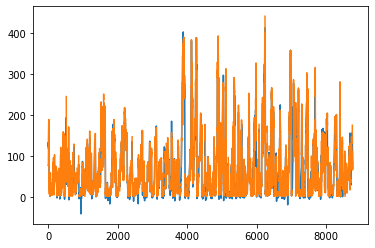

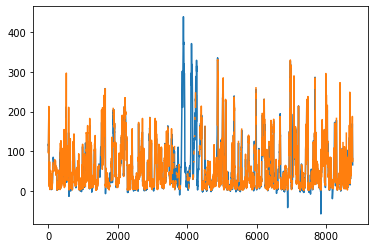

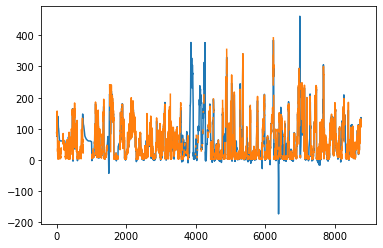

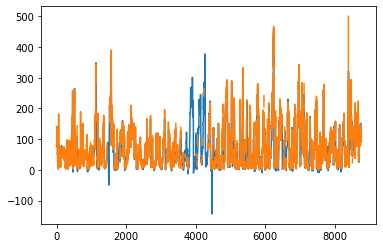

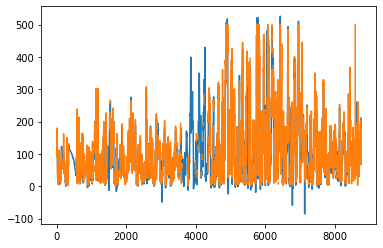

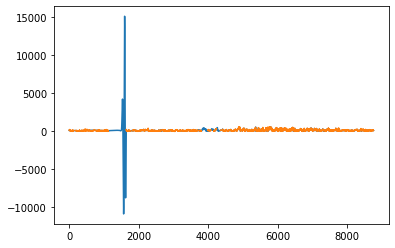

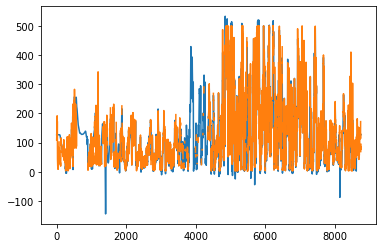

In [25]:
for i in range(inter.shape[0]):
    plt.plot(np.array(real.index), inter[i])
    plt.plot(np.array(real.index), real_value[i])
    plt.show()

In [26]:
df2 = pd.read_csv("./result/air_1000_0.05_time.csv")

In [27]:
df2

0         1         2         3         4         5         6  \
0     0.401774  0.279810  0.360868  0.242833  0.086404  0.213877  0.295998   
1     0.451451  0.316797  0.413688  0.290704  0.105267  0.255364  0.354530   
2     0.487761  0.341332  0.459038  0.340999  0.126429  0.298257  0.415502   
3     0.512864  0.352432  0.498844  0.396287  0.151900  0.344584  0.480740   
4     0.534623  0.353561  0.538846  0.460801  0.184989  0.398061  0.553173   
...        ...       ...       ...       ...       ...       ...       ...   
8754  0.042190 -0.116186 -0.175217 -0.263283 -0.263687 -0.220422 -0.234745   
8755 -0.002460 -0.110672 -0.127537 -0.244143 -0.252395 -0.225253 -0.128914   
8756 -0.016287 -0.071930 -0.045228 -0.203050 -0.227030 -0.200827  0.031221   
8757 -0.014376 -0.024212  0.040788 -0.156921 -0.196266 -0.163917  0.195276   
8758 -0.007503  0.015577  0.106911 -0.115420 -0.164350 -0.125642  0.319281   

             7         8         9  ...        26        27        28  \
0     0.126683  0.221683  0.036781  ... -0.000098  0.151738  0.394835   
1     0.158678  0.268889  0.060269  ... -0.000129  0.176671  0.440493   
2     0.198055  0.319916  0.095636  ... -0.000170  0.201258  0.470493   
3     0.248159  0.376474  0.145925  ... -0.000224  0.228097  0.485439   
4     0.312553  0.440922  0.213119  ... -0.000299  0.261943  0.491117   
...        ...       ...       ...  ...       ...       ...       ...   
8754 -0.302134 -0.182917 -0.286422  ...  0.165278  0.008405  0.254041   
8755 -0.306927 -0.181654 -0.268166  ...  0.141902  0.005552  0.147906   
8756 -0.284367 -0.147827 -0.218786  ...  0.143479  0.003493  0.095731   
8757 -0.247525 -0.101948 -0.156843  ...  0.151436  0.002095  0.079340   
8758 -0.205291 -0.059106 -0.097797  ...  0.153079  0.001197  0.079350   

            29        30        31        32        33        34            35  
0     0.000966  0.458248  0.208899  0.245027  0.027390  0.000529 -1.198541e-12  
1     0.011909  0.525825  0.241614  0.297412  0.047883  0.000282 -1.845464e-12  
2     0.033288  0.582028  0.272617  0.354203  0.077187 -0.000194 -2.779611e-12  
3     0.070550  0.627257  0.304781  0.417420  0.116405 -0.000948 -4.094055e-12  
4     0.130272  0.666628  0.343696  0.489755  0.165371 -0.002011 -5.894684e-12  
...        ...       ...       ...       ...       ...       ...           ...  
8754  0.111733  0.409503  0.940556  0.606984 -0.107944 -0.299522 -9.417353e-96  
8755  0.084301  0.307762  1.101336  0.817133  0.183108 -0.309144 -5.745186e-96  
8756  0.100361  0.269719  1.254229  1.051001  0.529823 -0.289419 -3.239570e-96  
8757  0.134529  0.267290  1.351049  1.244171  0.846443 -0.249901 -1.689130e-96  
8758  0.164044  0.271769  1.354997  1.337755  1.055628 -0.201037 -8.147213e-97  

[8759 rows x 36 columns]

In [28]:
df2 = pd.read_csv("./result/air_1000_0.05_time.csv")
real = pd.read_csv("./dataset/pm25_ground.txt").drop(['datetime'], axis = 1)
missing = pd.read_csv("./dataset/pm25_missing.txt").drop(['datetime'], axis = 1)
Nonscale_imputataion2 = pd.DataFrame(df2.values , columns = real.columns)
Nonscale_imputataion2 = (Nonscale_imputataion2 * missing.std()) + missing.mean()

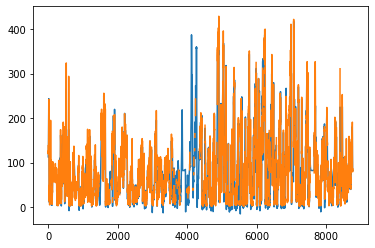

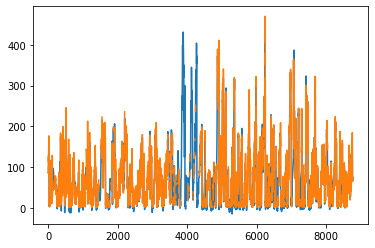

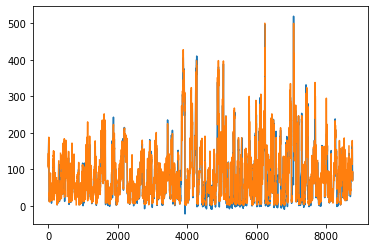

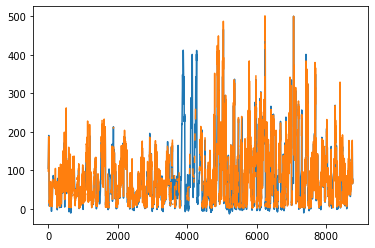

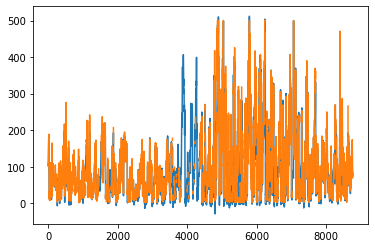

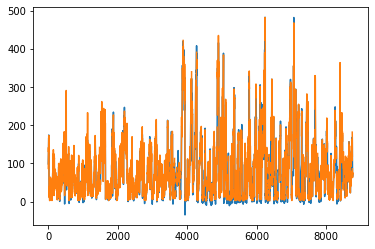

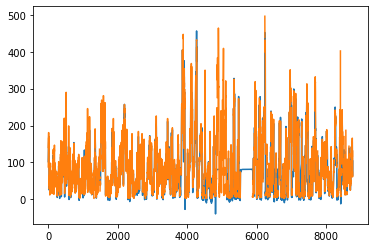

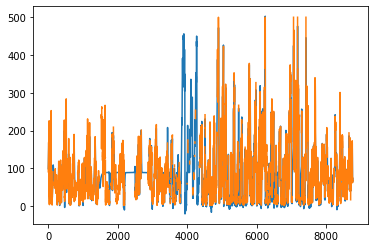

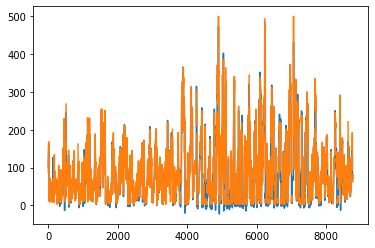

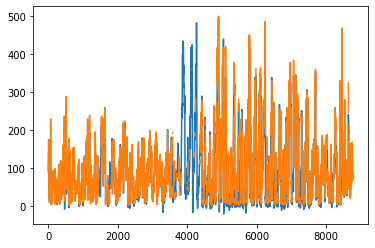

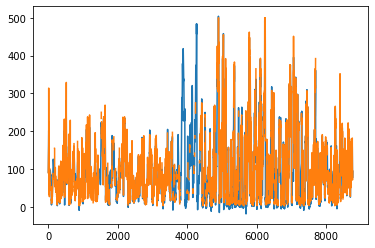

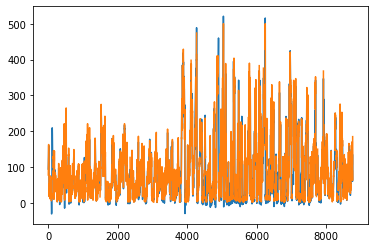

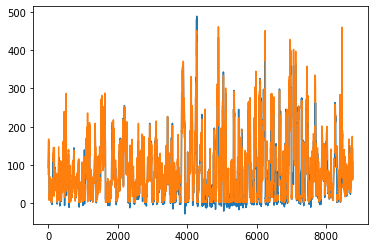

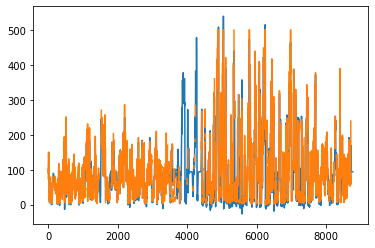

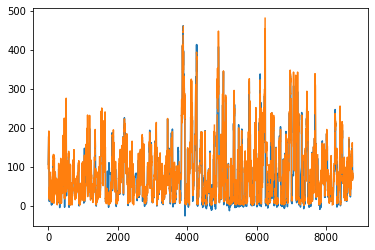

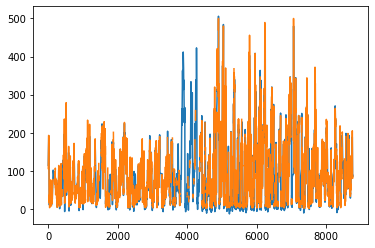

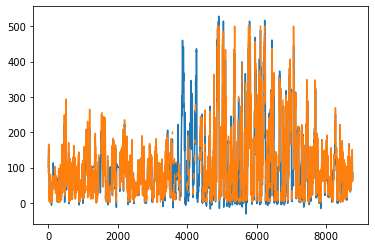

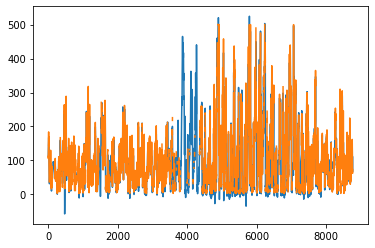

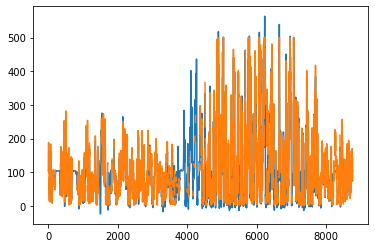

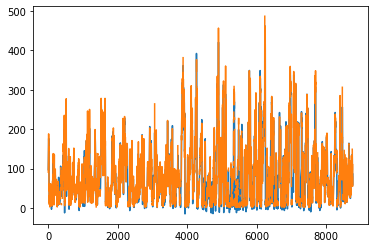

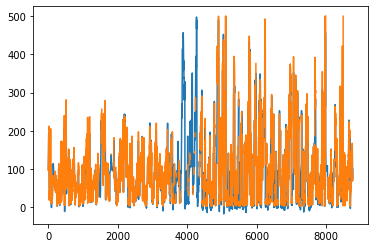

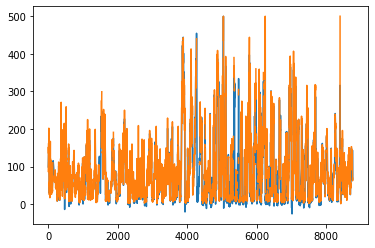

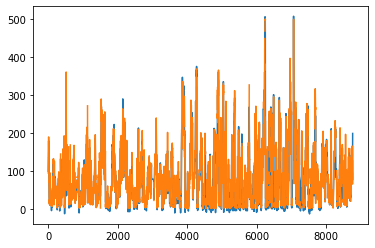

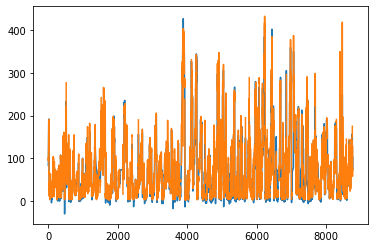

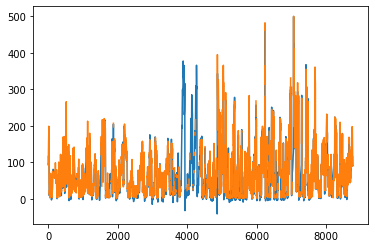

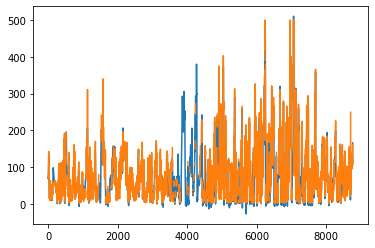

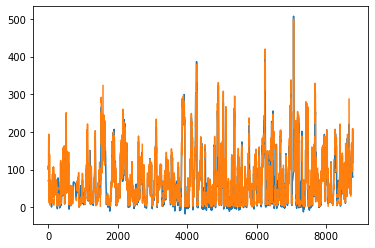

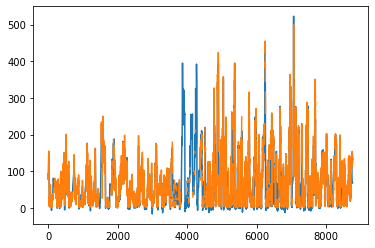

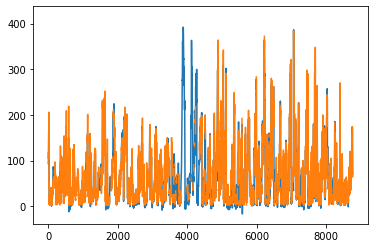

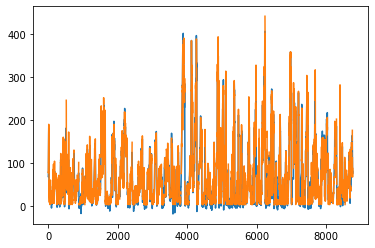

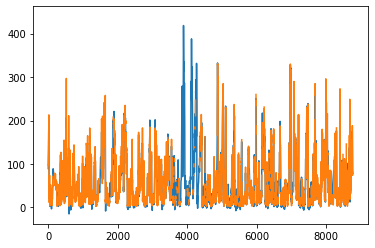

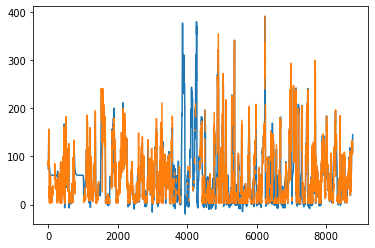

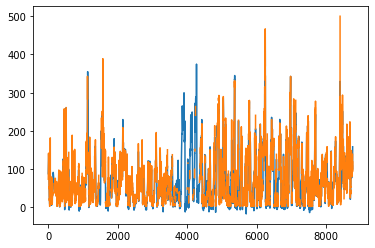

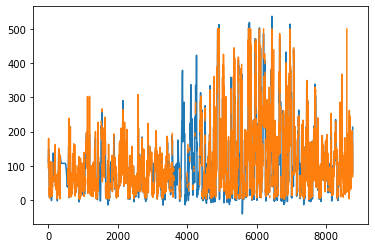

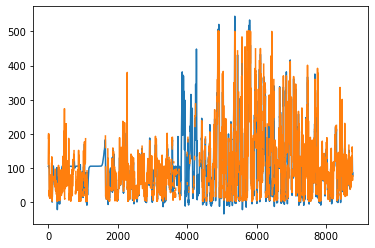

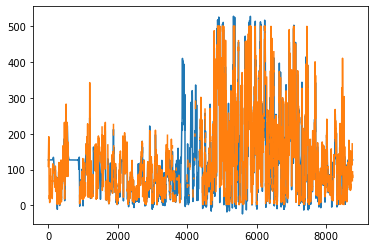

In [29]:
df2 = pd.read_csv("./result/air_1000_0.05_time.csv")
real = pd.read_csv("./dataset/pm25_ground.txt").drop(['datetime'], axis = 1)
missing = pd.read_csv("./dataset/pm25_missing.txt").drop(['datetime'], axis = 1)
Nonscale_imputataion2 = pd.DataFrame(df2.values , columns = real.columns)
Nonscale_imputataion2 = (Nonscale_imputataion2 * missing.std()) + missing.mean()
inter = Nonscale_imputataion2.values.T
for i in range(inter.shape[0]):
    plt.plot(np.array(real.index), inter[i])
    plt.plot(np.array(real.index), real_value[i])
    plt.show()

In [41]:
Nonscale_imputataion = eval_model("air_1000_0.05_time.csv", "pm25_ground.txt", "pm25_missing.txt")

Scale MAE : 0.32600546734531616
Scale MRE : 0.4706488933347002
Original MAE : 26.244345089085357
Original MRE : 0.36865024996703916


In [33]:
Nonscale_imputataion = eval_model("air_1000_0.042_time.csv", "pm25_ground.txt", "pm25_missing.txt")

Scale MAE : 0.3140292682488413
Scale MRE : 0.45335904572260033
Original MAE : 25.276986157275925
Original MRE : 0.3550619089050362


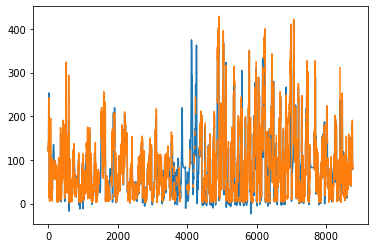

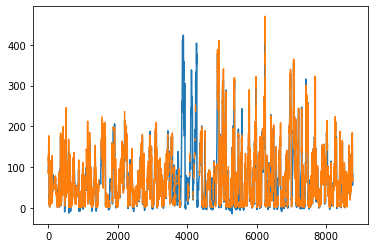

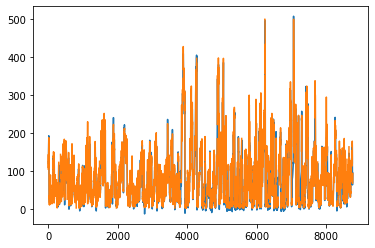

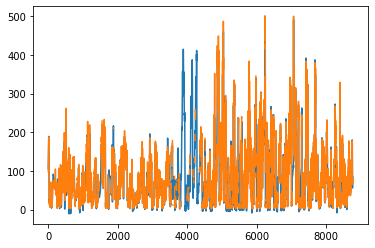

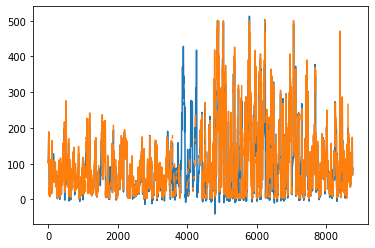

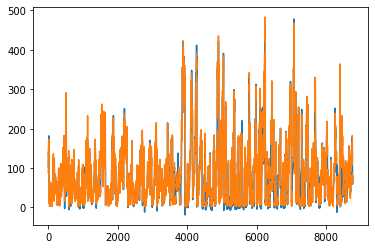

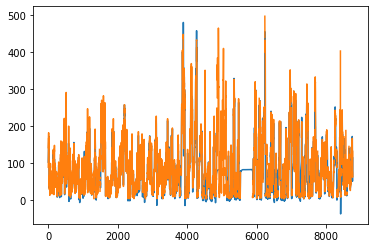

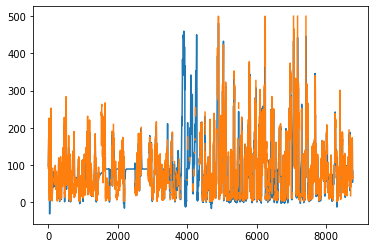

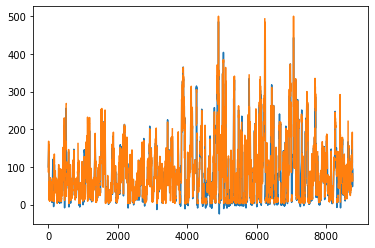

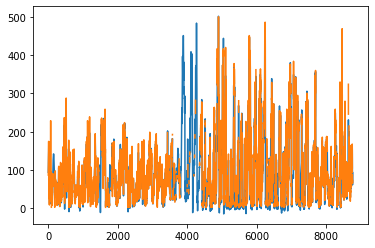

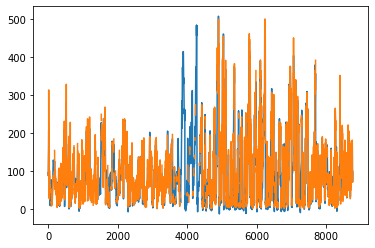

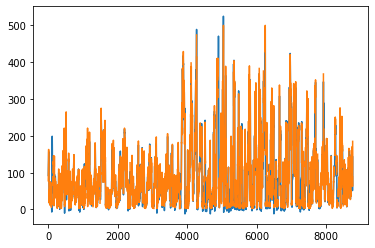

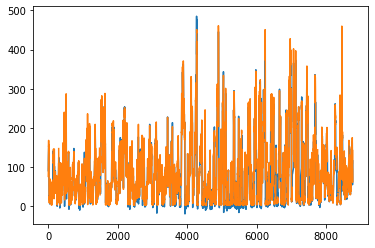

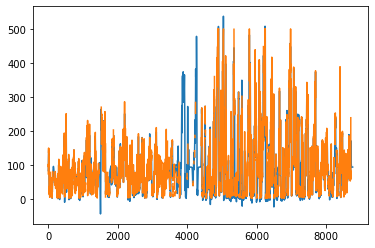

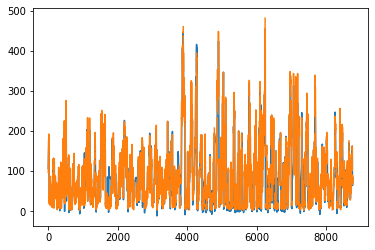

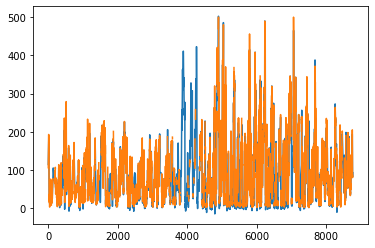

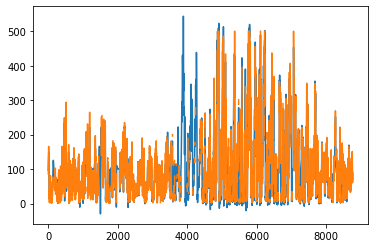

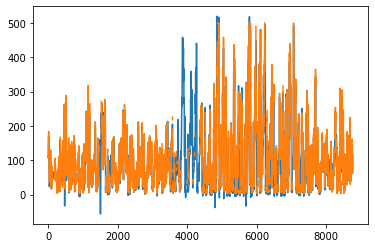

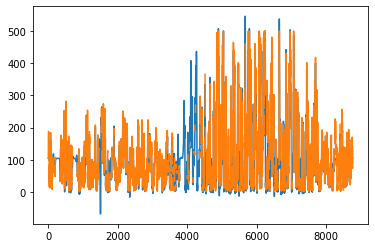

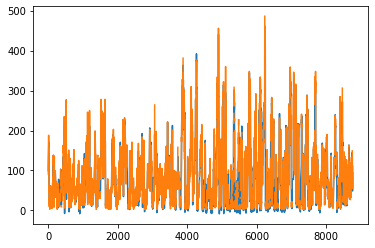

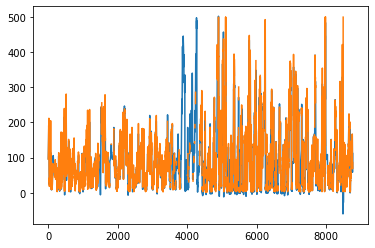

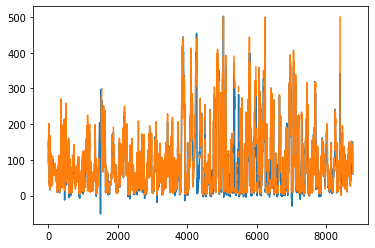

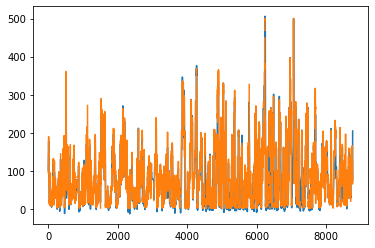

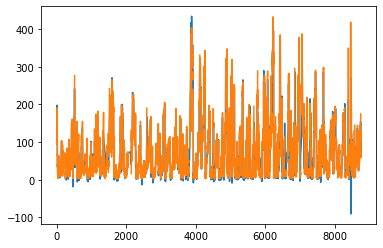

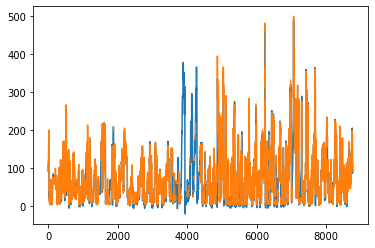

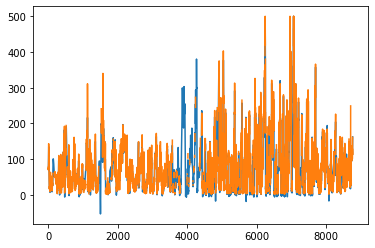

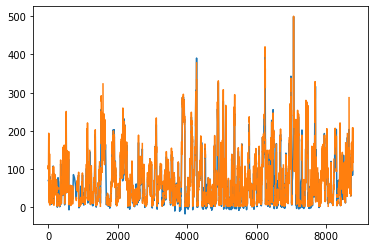

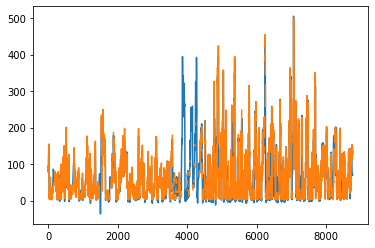

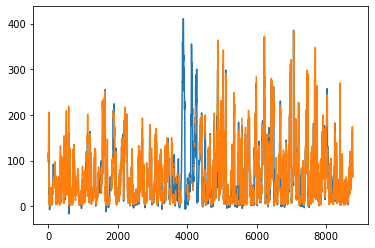

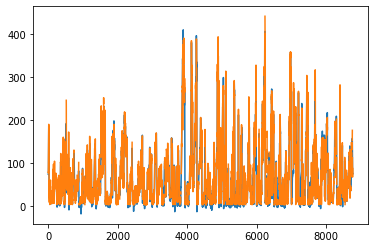

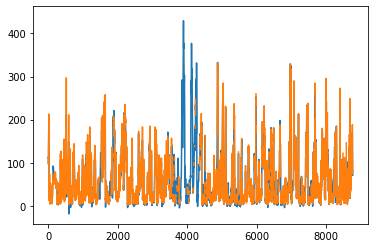

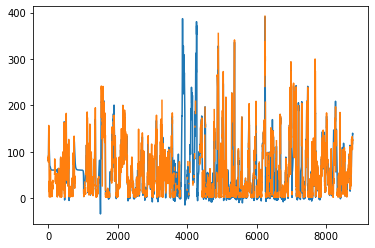

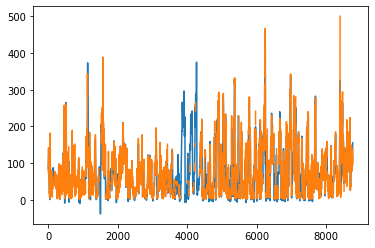

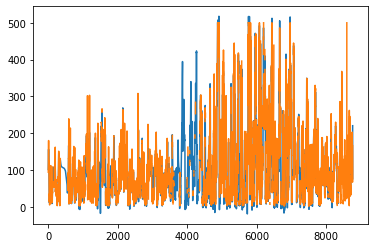

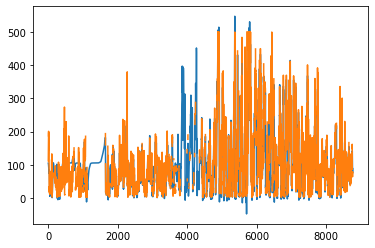

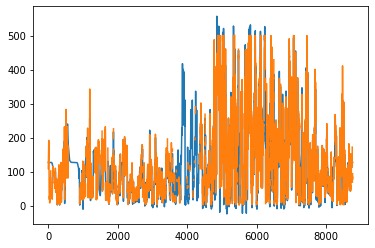

In [34]:
df2 = pd.read_csv("./result/air_1000_0.042_time.csv")
real = pd.read_csv("./dataset/pm25_ground.txt").drop(['datetime'], axis = 1)
missing = pd.read_csv("./dataset/pm25_missing.txt").drop(['datetime'], axis = 1)
Nonscale_imputataion2 = pd.DataFrame(df2.values , columns = real.columns)
Nonscale_imputataion2 = (Nonscale_imputataion2 * missing.std()) + missing.mean()
inter = Nonscale_imputataion2.values.T
for i in range(inter.shape[0]):
    plt.plot(np.array(real.index), inter[i])
    plt.plot(np.array(real.index), real_value[i])
    plt.show()

In [38]:
Nonscale_imputataion = eval_model("air_1000_0.04_time.csv", "pm25_ground.txt", "pm25_missing.txt")

Scale MAE : 0.313986746528428
Scale MRE : 0.45329765779307213
Original MAE : 25.30045086017604
Original MRE : 0.3553915139517678


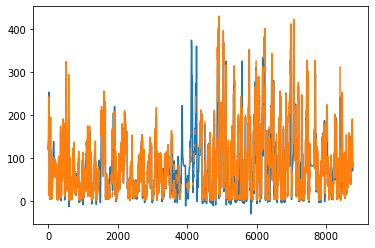

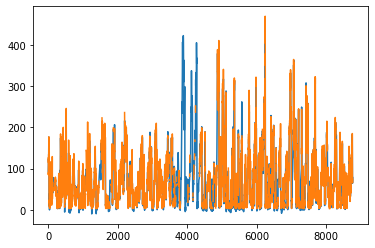

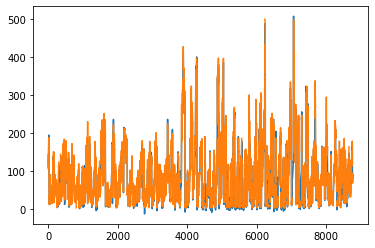

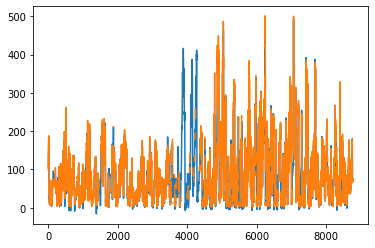

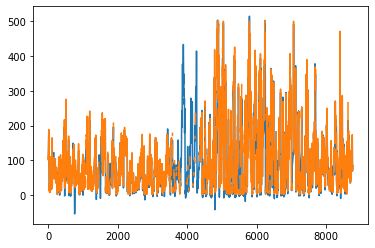

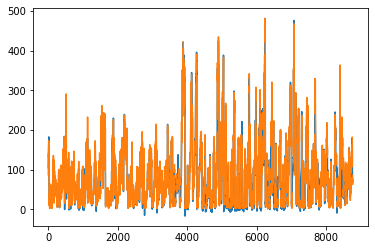

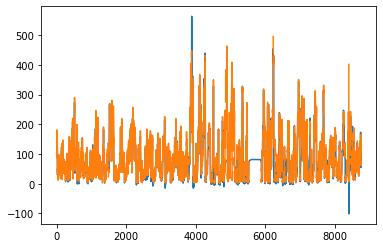

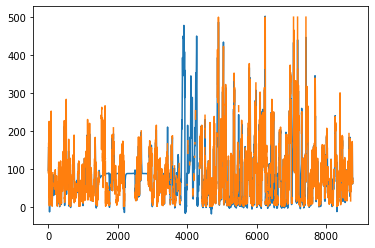

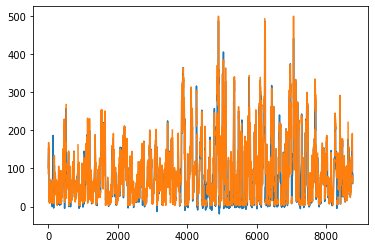

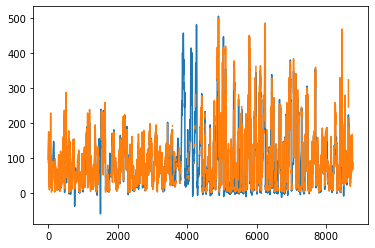

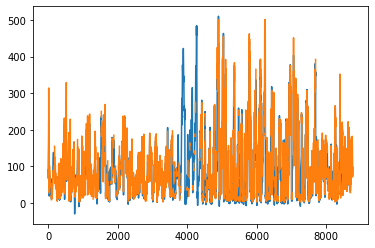

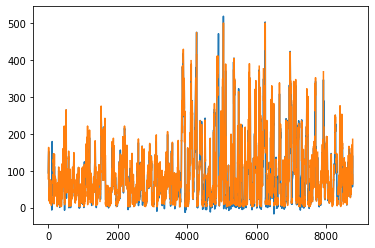

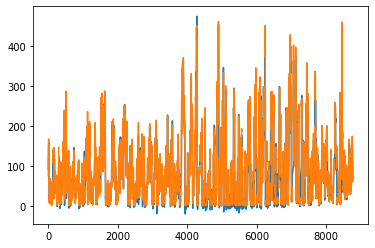

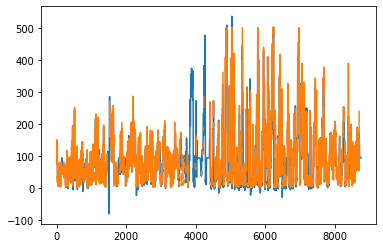

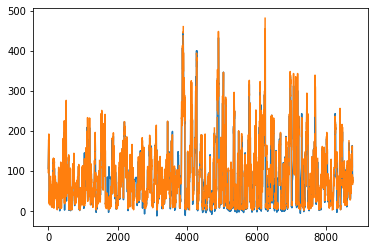

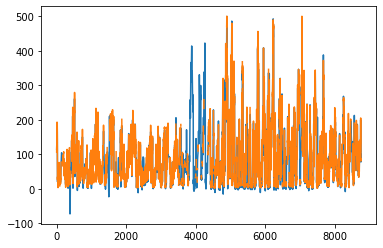

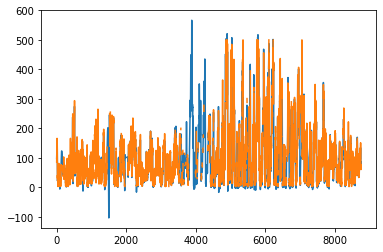

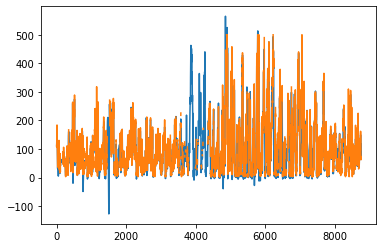

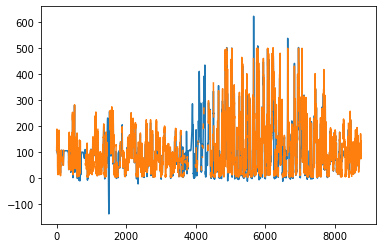

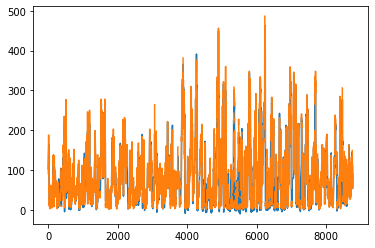

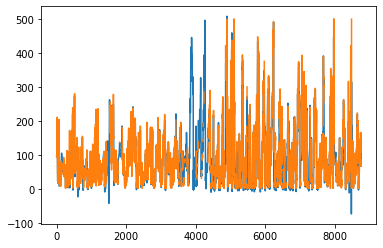

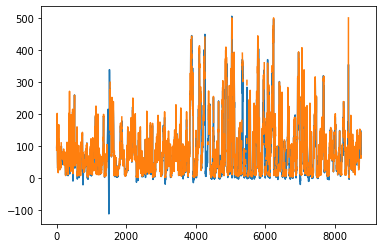

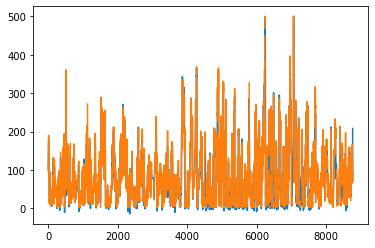

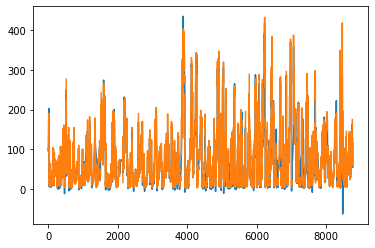

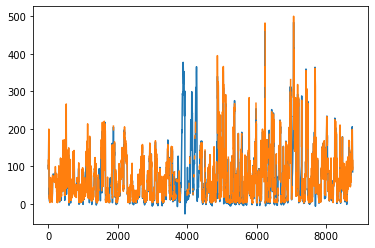

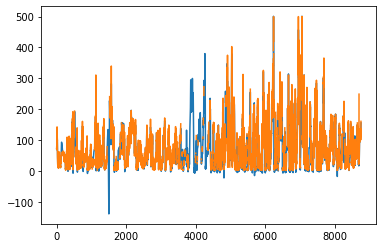

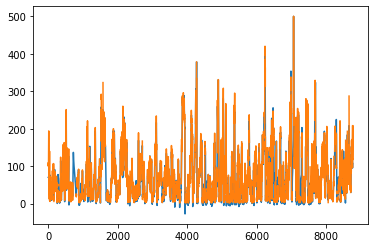

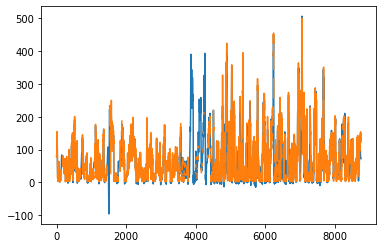

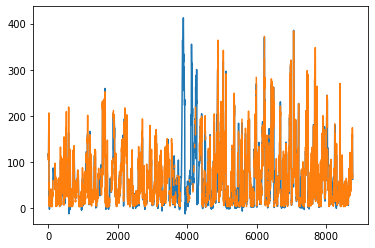

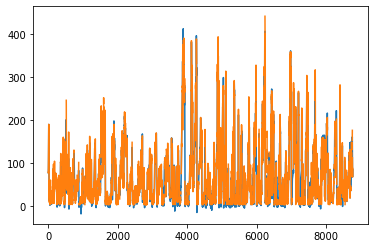

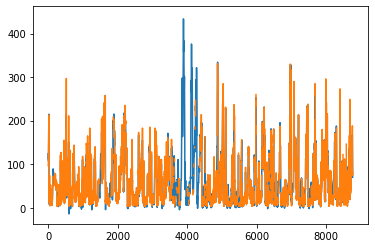

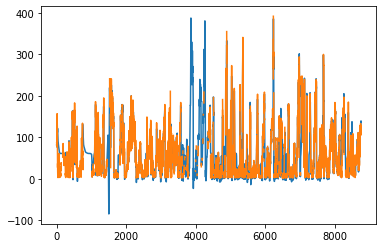

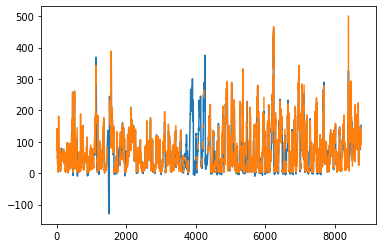

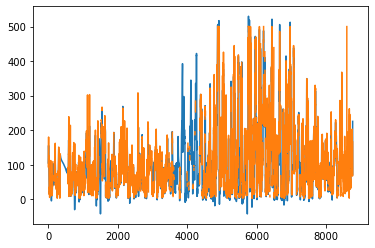

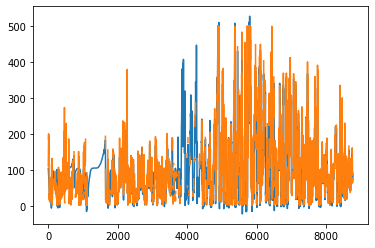

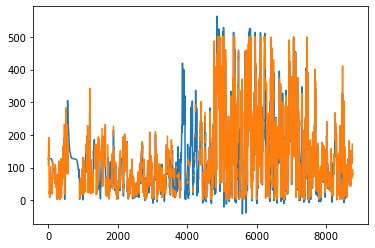

In [37]:
df3 = pd.read_csv("./result/air_1000_0.04_time.csv")
real = pd.read_csv("./dataset/pm25_ground.txt").drop(['datetime'], axis = 1)
missing = pd.read_csv("./dataset/pm25_missing.txt").drop(['datetime'], axis = 1)

Nonscale_imputataion2 = pd.DataFrame(df3.values , columns = real.columns)
Nonscale_imputataion2 = (Nonscale_imputataion2 * missing.std()) + missing.mean()
inter = Nonscale_imputataion2.values.T

for i in range(inter.shape[0]):
    plt.plot(np.array(real.index), inter[i])
    plt.plot(np.array(real.index), real_value[i])
    plt.show()

In [40]:
Nonscale_imputataion = eval_model("air_1000_0.045_time.csv", "pm25_ground.txt", "pm25_missing.txt")

Scale MAE : 0.3185211080545051
Scale MRE : 0.4598438432040276
Original MAE : 25.645696197681236
Original MRE : 0.360241121725908


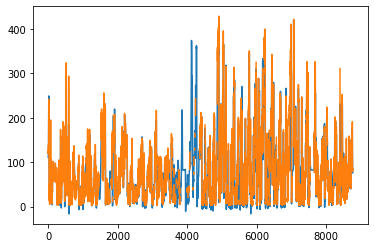

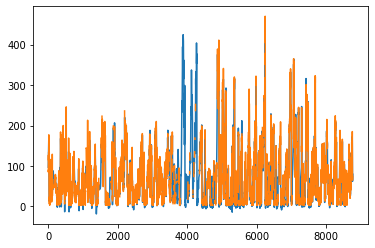

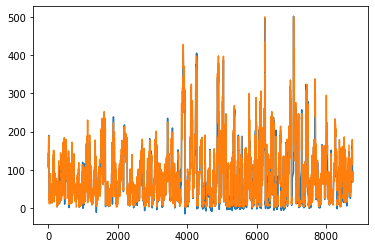

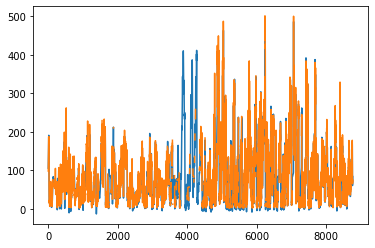

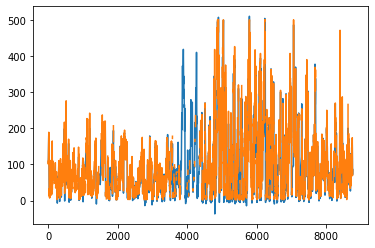

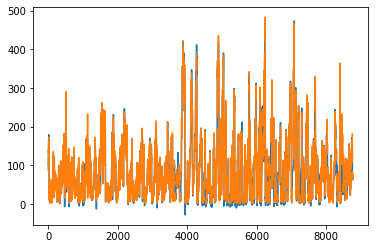

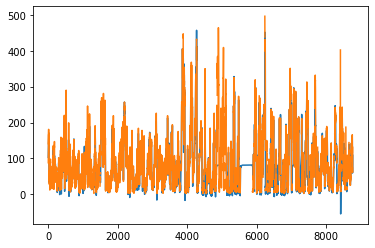

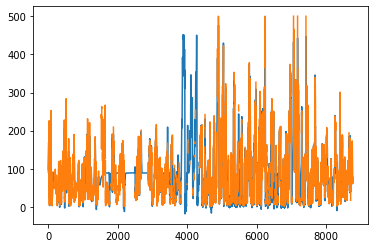

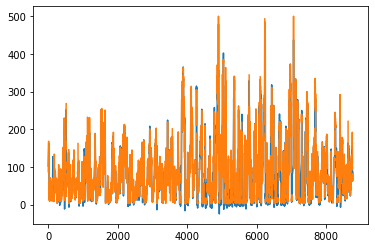

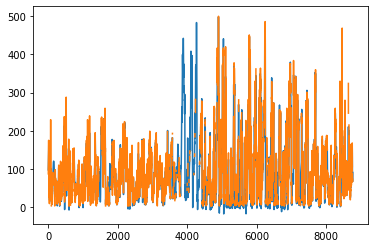

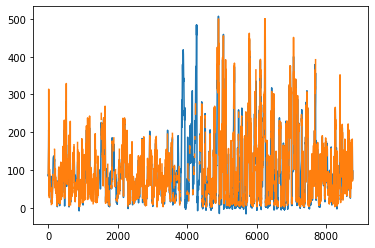

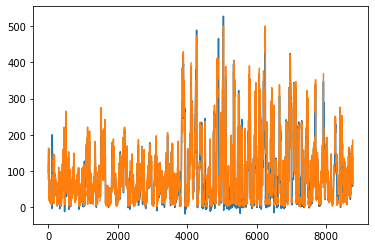

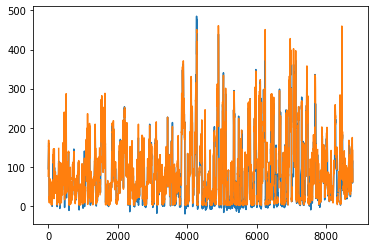

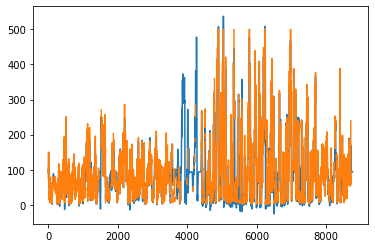

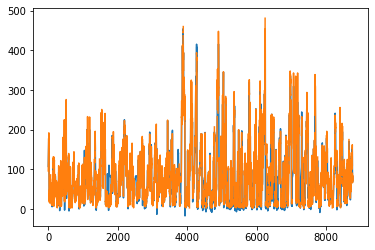

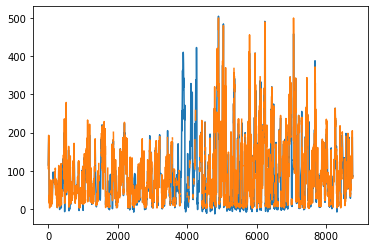

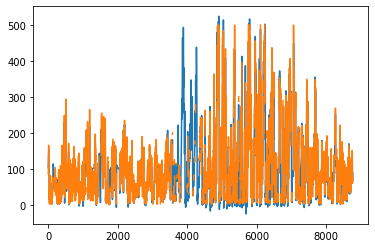

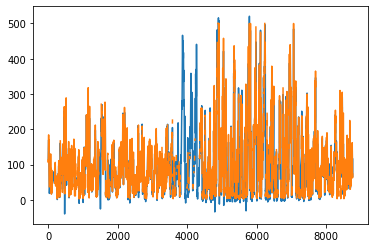

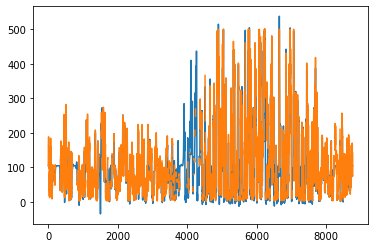

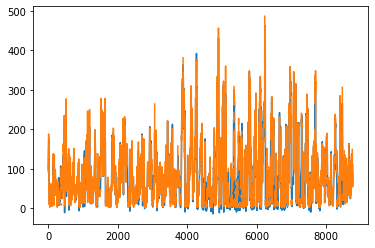

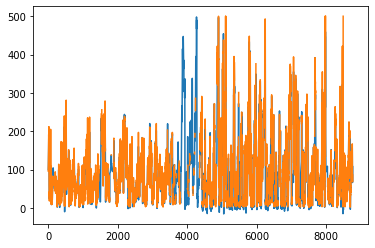

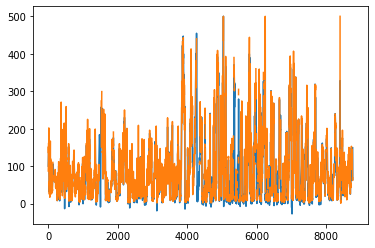

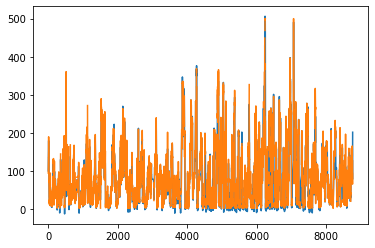

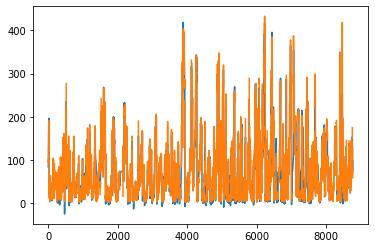

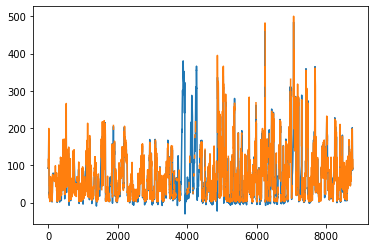

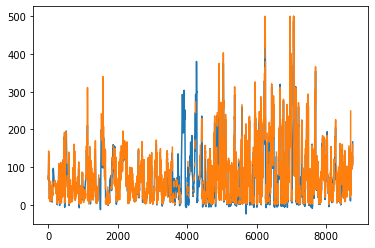

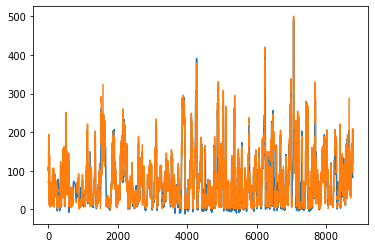

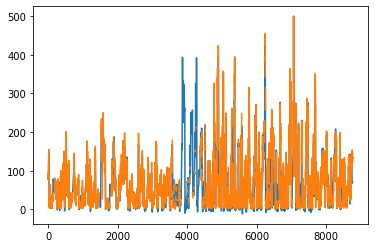

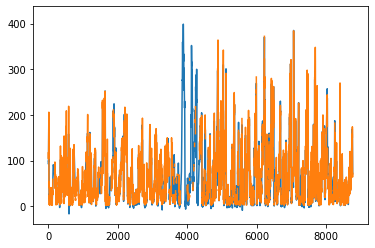

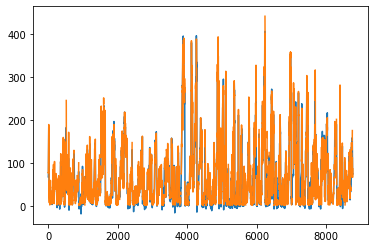

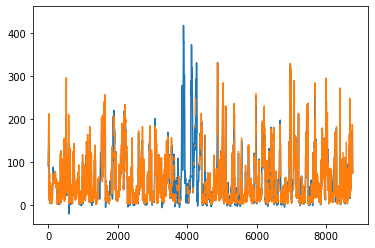

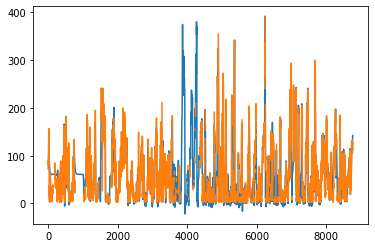

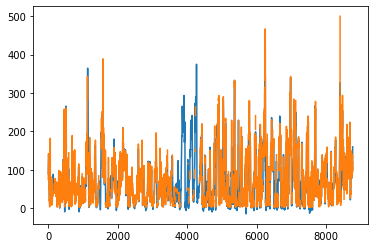

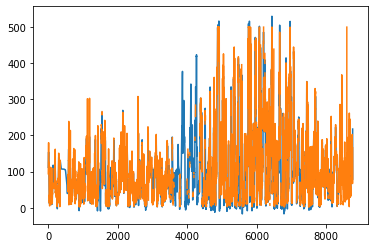

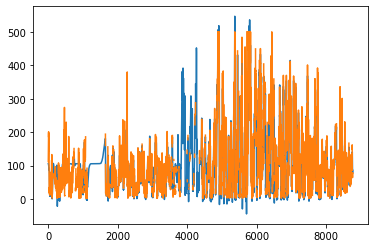

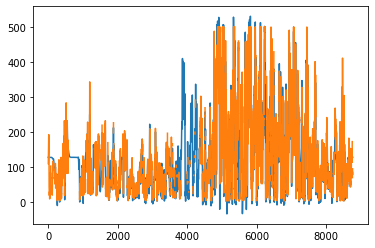

In [39]:
df4 = pd.read_csv("./result/air_1000_0.045_time.csv")
real = pd.read_csv("./dataset/pm25_ground.txt").drop(['datetime'], axis = 1)
missing = pd.read_csv("./dataset/pm25_missing.txt").drop(['datetime'], axis = 1)


Nonscale_imputataion2 = pd.DataFrame(df4.values , columns = real.columns)
Nonscale_imputataion2 = (Nonscale_imputataion2 * missing.std()) + missing.mean()
inter = Nonscale_imputataion2.values.T


for i in range(inter.shape[0]):
    plt.plot(np.array(real.index), inter[i])
    plt.plot(np.array(real.index), real_value[i])
    plt.show()

In [50]:
def eval_model_nonscale(imputations, realpath, dfpath):
    
    imputation = pd.read_csv("./result/" + imputations)
    imputation = imputation

    df = pd.read_csv("./dataset/" + dfpath).drop(['datetime'], axis = 1)
    real = pd.read_csv("./dataset/" + realpath).drop(['datetime'], axis = 1)

    masks = ~np.isnan(df.values)
    masks = torch.from_numpy(masks).to(torch.float32).detach().numpy()

    real_masks = ~np.isnan(real.values)
    real_masks = torch.from_numpy(real_masks).to(torch.float32).detach().numpy()

    test_masks = real_masks - masks

    Nonscale_imputataion = pd.DataFrame(imputation.values , columns = df.columns)

    real = real.fillna(0)

    print("Original MAE :", np.sum(np.abs((Nonscale_imputataion - real).values * test_masks)) / np.sum(test_masks))
    print("Original MRE :", np.sum(np.abs((Nonscale_imputataion - real).values * test_masks)) / np.sum(np.abs(real.values * test_masks)))

    print('-----------------------------')
    print("train")
    print("train MAE :", np.sum(np.abs((Nonscale_imputataion - real).values * masks)) / np.sum(masks))
    print("train MRE :", np.sum(np.abs((Nonscale_imputataion - real).values * masks)) / np.sum(np.abs(real.values * masks)))

    return Nonscale_imputataion

In [45]:
imputation = pd.read_csv("./result/" + "air_1000_430.0_time.csv")

In [51]:
Nonscale_imputataion = eval_model_nonscale("air_1000_430.0_time.csv", "pm25_ground.txt", "pm25_missing.txt")

Original MAE : 26.751128371700617
Original MRE : 0.37576895623237216
-----------------------------
train
train MAE : 7.601552425509593
train MRE : 0.0896677276192367


In [49]:
imputation = pd.read_csv("./result/" + "air_1500_16.0_time.csv")

0.001

In [52]:
Nonscale_imputataion = eval_model_nonscale("air_1500_16.0_time.csv", "pm25_ground.txt", "pm25_missing.txt")

Original MAE : 26.502531642534883
Original MRE : 0.3722769564877853
-----------------------------
train
train MAE : 7.500533263033194
train MRE : 0.08847610803441883
